#Analyse du dataset

##Introduction
Projet de MLOps Machine learning end to end allant du dataset ( interpretation, pre processing, analyse) en passant par le développement jusqu'au déployement avec une notion d'explicabilité nécessaire dans notre cas d'étude à savoir l'imagerie médicale. Notre dataset est composé d'images médicales cérébrales à classifier grâce au machine learning. Deux algorithmes basés sur la méthode transformer sont proposés : transformer + heatmap ou transformer + attention rollout. 


##Programmation

In [ ]:
import scipy as sc
import numpy as np
import matplotlib
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Chemin vers le dataset préalablement chargé dans le drive
data_dir="/content/drive/MyDrive/Projet_IA_Imagerie/dataset/"
dir_train= "/content/drive/MyDrive/Projet_IA_Imagerie/dataset/Training/"
dir_test = "/content/drive/MyDrive/Projet_IA_Imagerie/dataset/Testing/"

###En utilisant Keras

In [2]:
#information sur les classes 
data_ds = keras.utils.image_dataset_from_directory(data_dir, batch_size=64, image_size=(224, 224))#training and testing
train_ds = keras.utils.image_dataset_from_directory(dir_train, batch_size=64, image_size=(224, 224))
test_ds = keras.utils.image_dataset_from_directory(dir_test, batch_size=64, image_size=(224, 224))
class_names = train_ds.class_names
print(class_names)

NameError: ignored

NameError: ignored

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


(64, 224, 224, 3)
(64,)


L' image_batch est un tenseur de la forme (64, 224, 224, 3) . Il s'agit d'un lot de 64 images de forme 224x224x3 (la dernière dimension fait référence aux canaux de couleur RVB). Le label_batch est un tenseur de la forme (64,) , ce sont des labels correspondants aux 64 images.
Vous pouvez appeler .numpy() sur l'un de ces tenseurs pour les convertir en numpy.ndarray .


Visualisation sur un lot de 64 images

(224, 224, 3)


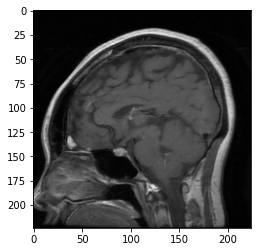

In [ ]:
pic=image_batch.numpy()[1].astype("uint8")
print(np.shape(pic))
plt.imshow(pic)

Manière rustique

In [ ]:
#On stock les information sur les classes dans des listes
nb_train=[826,822,395,827]
nb_test=[100,115,105,74]
total=[926,937,500,901]

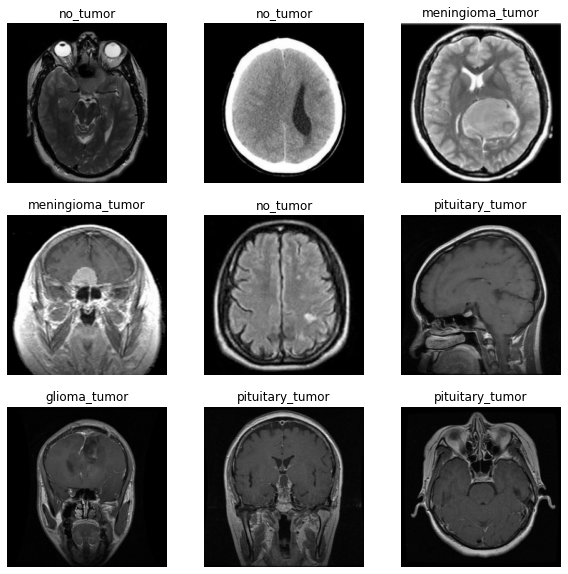

In [ ]:
#Affichage d'un échantillon des données
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


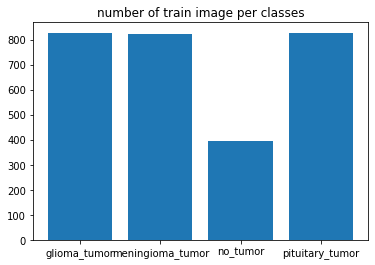

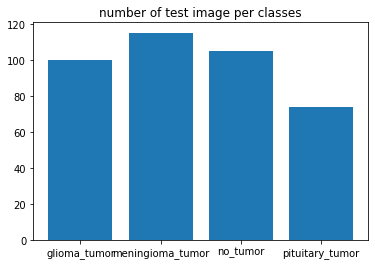

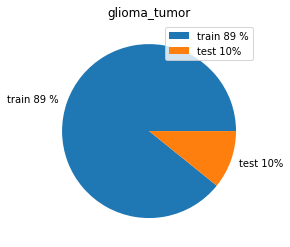

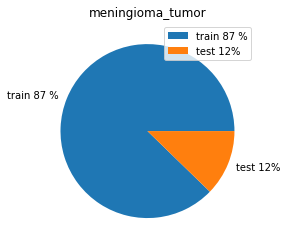

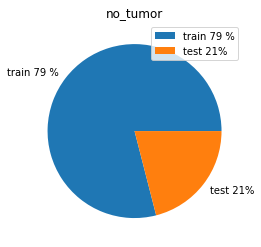

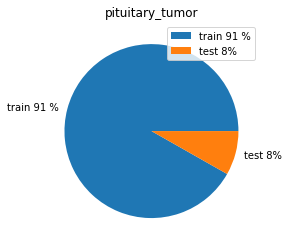

In [ ]:
#Analyse des données
plt.bar(class_names,nb_train)
plt.title("number of train image per classes")
plt.show()
plt.bar(class_names,nb_test)
plt.title("number of test image per classes")
plt.show()

for i in range(4):
    per_train=(100*nb_train[i])/total[i]
    per_test=(100*nb_test[i])/total[i] 
    plt.pie([per_train,per_test], labels = [f'train {int(per_train)} %', f'test {int(per_test)}%'])
    plt.title(class_names[i])
    plt.legend()
    plt.show()


Type of the image :  <class 'numpy.ndarray'>
Shape of the image : (224, 224, 3)
Image Hight 224
Image Width 224
Dimension of Image 3
Image size 150528
Maximum RGB value in this image 255
Value of only R channel 169
Value of only G channel 169
Value of only B channel 169


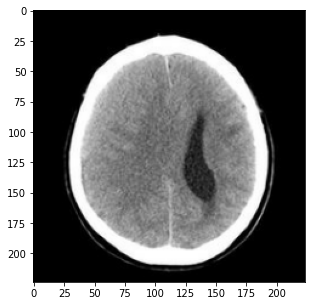

In [ ]:
import imageio
pic = images[1].numpy().astype("uint8")
plt.figure(figsize = (5,5))
plt.imshow(pic)
print('Type of the image : ' , type(pic)) 
print('Shape of the image : {}'.format(pic.shape)) 
print('Image Hight {}'.format(pic.shape[0])) 
print('Image Width {}'.format(pic.shape[1])) 
print('Dimension of Image {}'.format(pic.ndim))
print('Image size {}'.format(pic.size)) 
print('Maximum RGB value in this image {}'.format(pic.max())) 

# A specific pixel located at Row : 100 ; Column : 50  
# Each channel's value of it, gradually R , G , B  
print('Value of only R channel {}'.format(pic[ 100, 50, 0])) 
print('Value of only G channel {}'.format(pic[ 100, 50, 1])) 
print('Value of only B channel {}'.format(pic[ 100, 50, 2]))
#images en noir et blanc

###En utilisant PIL

In [ ]:
#Librairies
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import glob
import pathlib
import keras

In [ ]:
data_dir=pathlib.Path(data_dir)
dir_train= pathlib.Path(dir_train)
dir_test = pathlib.Path(dir_test)

In [ ]:
#nombre d'image
image_count_train = len(list(dir_train.glob('*/*.jpg')))
image_count_test = len(list(dir_test.glob('*/*.jpg')))
print("nombre d'image d'entraînement",image_count_train )
print("nombre d'image de test",image_count_test )

nombre d'image d'entraînement 2880
nombre d'image de test 394


In [ ]:
#On importe deux des classes dans des listes : glioma_tumor et no_tumor cad prb vs pas de prb
glioma_tumor_train = list(dir_train.glob('glioma_tumor/*'))
glioma_tumor_test = list(dir_test.glob('glioma_tumor/*'))
no_tumor_train = list(dir_train.glob('glioma_tumor/*'))
no_tumor_test = list(dir_test.glob('glioma_tumor/*'))

In [ ]:
glioma_tumor_count_train = len(glioma_tumor_train)
glioma_tumor_count_test = len(glioma_tumor_test)
no_tumor_count_train = len(no_tumor_train)
no_tumor_count_test = len(no_tumor_test)

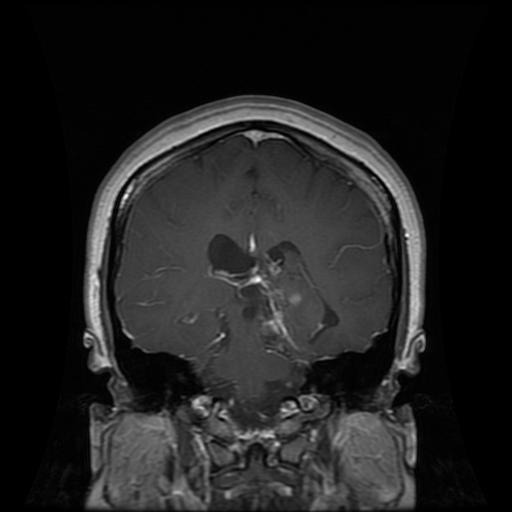

In [ ]:
#Visualisation d'une image
PIL.Image.open(str(glioma_tumor_train[0]))

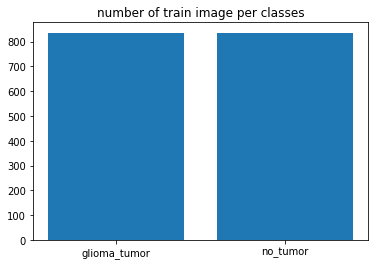

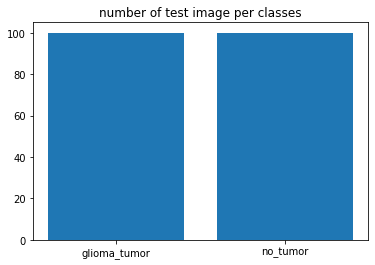

In [ ]:
#Analyse des données
plt.bar(['glioma_tumor','no_tumor'],[glioma_tumor_count_train,no_tumor_count_train])
plt.title("number of train image per classes")
plt.show()
plt.bar(['glioma_tumor','no_tumor'],[glioma_tumor_count_test,no_tumor_count_test])
plt.title("number of test image per classes")
plt.show()
